In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

PCA reduced features from 64 to 40

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.89      0.86      0.87        36
           2       1.00      1.00      1.00        35
           3       0.97      1.00      0.99        37
           4       0.95      1.00      0.97        36
           5       0.97      1.00      0.99        37
           6       1.00      0.97      0.99        36
           7       0.95      0.97      0.96        36
           8       0.86      0.86      0.86        35
           9       0.97      0.92      0.94        36

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360


Confusion Matrix:
[[35  0  0  0  1  0  0  0  0  0]
 [ 0 31  0  1  0  1  0  0  2  1]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0  0  0]
 [ 0  0  0  0 36  0  0  0  0  0

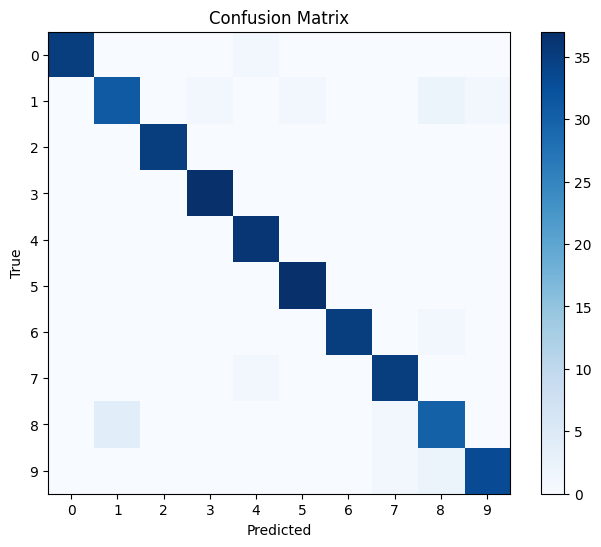

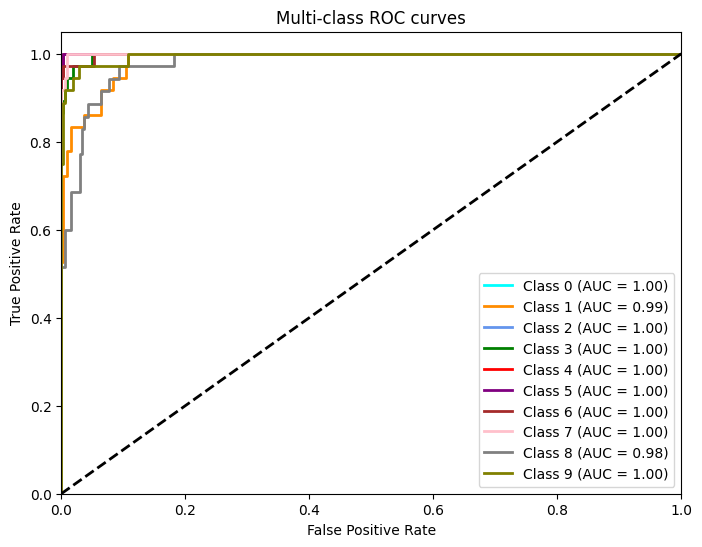

In [1]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize, StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

digits = load_digits()
X, y = digits.data, digits.target
classes = digits.target_names

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(0.95) 
X_pca = pca.fit_transform(X_scaled)
print(f"PCA reduced features from {X.shape[1]} to {X_pca.shape[1]}")

X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)

clf = LogisticRegression(max_iter=5000, solver='lbfgs', multi_class='ovr')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

plt.figure(figsize=(8,6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks(np.arange(len(classes)), classes)
plt.yticks(np.arange(len(classes)), classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

y_bin = label_binarize(y, classes=range(len(classes)))
n_classes = y_bin.shape[1]
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(
    X_pca, y_bin, test_size=0.2, random_state=42, stratify=y
)

clf_ovr = OneVsRestClassifier(LogisticRegression(max_iter=5000))
y_score = clf_ovr.fit(X_train_bin, y_train_bin).decision_function(X_test_bin)


fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive'])
plt.figure(figsize=(8,6))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-class ROC curves")
plt.legend(loc="lower right")
plt.show()


/tmp/ipykernel_36/1280744834.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.get_cmap('tab10', 10), alpha=0.7)


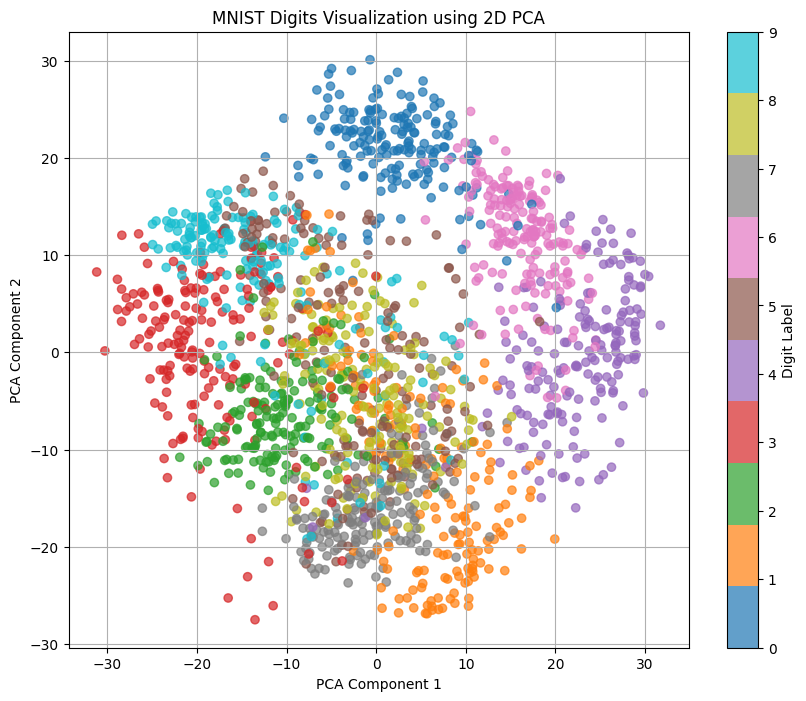

In [3]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.get_cmap('tab10', 10), alpha=0.7)
plt.colorbar(scatter, ticks=range(10), label="Digit Label")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("MNIST Digits Visualization using 2D PCA")
plt.grid(True)
plt.show()
